# Fresh Start Annual Golf Charity Event Expenses

## Introduction

Hello and welcome to my analysis for the Golf Event expenses for the annual Golf Classic Charity event in Chicago and San Diego.
These data sets contain information on the spending for the event such as awards and gifts, venue fees and more. It has data from the 2021-2023 for Chicago and 2020, 2022, and 2023.

Below is a table of the metadata from the original files of the expenses.
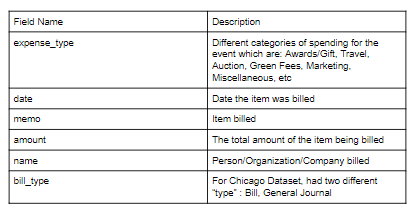

## Cleaning and EDA

Since most of the data are in a "ledger style"/accounting format, I cleaned the data set on excel with adjustments to make it easier for data analysis and visualization. However, there was a problem with the Chicago data set as the expesnes were only divided into two categories: Golf event, Travel and Lodging which prompted me to categories these expenses manually with reference to the San Diego data set as most of the items are the same such as Photopraher fees being under Marketing and Communication. 

In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel('freshstartExpensesclean.xlsx')
print(df)

      location    expense_type       date  \
0    san_diego         auction 2020-03-01   
1    san_diego         auction 2020-03-01   
2    san_diego         auction 2020-03-06   
3    san_diego         auction 2020-03-06   
4    san_diego         auction 2020-03-07   
..         ...             ...        ...   
232    chicago  travel_lodging 2023-06-30   
233    chicago           venue 2021-05-28   
234    chicago           venue 2021-06-28   
235    chicago           venue 2022-05-23   
236    chicago           venue 2023-06-13   

                                        memo                name     amount  
0                                 auctioneer                 NaN    1000.00  
1                       hotel_dinner_package                 NaN    1206.50  
2                     silent_auction_buckets                 NaN     148.45  
3                                     frames                 NaN     150.74  
4                              football_pens                 NaN     

Here is a visualization of the expenses over the years from the two locations. We can see that both events have a steady increase in total expenses.

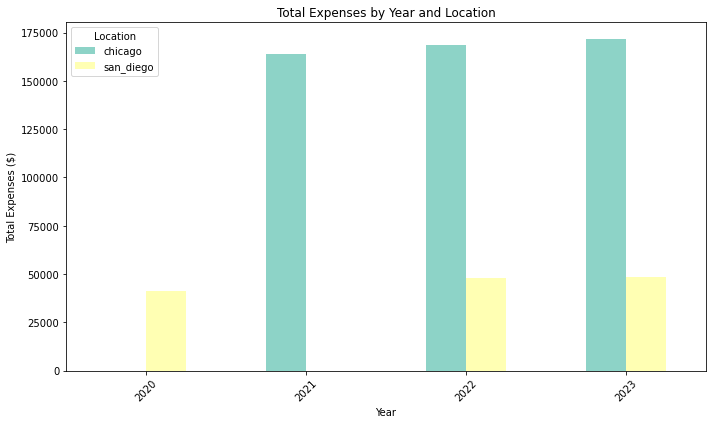

In [3]:
df['Year'] = pd.to_datetime(df['date']).dt.year

# Group the data by 'Year' and 'location', and sum the 'amount'
grouped_expenses = df.groupby(['Year', 'location'])['amount'].sum().unstack(fill_value=0)

# Get the Set3 colormap
cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in range(len(grouped_expenses.columns))]

# Plot the double bar graph with 'Set3' colors
grouped_expenses.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Total Expenses by Year and Location')
plt.xlabel('Year')
plt.ylabel('Total Expenses ($)')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

Here is a visualization of the proportions of the expenses for each category for both locations in the form of a pie chart. We can see that for both locations, venue fees is the most spent with both more than half of the total. For San Diego, it is roughly 55.5% (From pre-dinner venues and green fees) and for Chicago is around 64%.

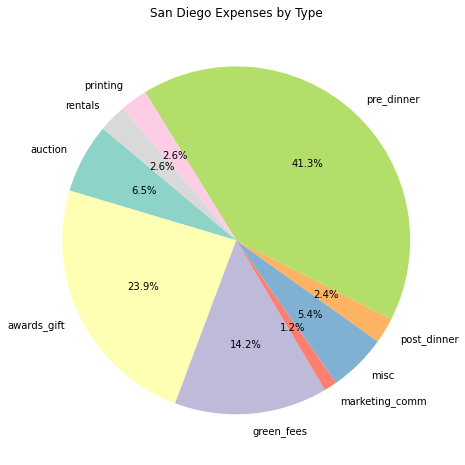

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
san_diego_2023_df = df[(df['location'] == 'san_diego')].copy()

# Group by expense type and sum the amounts
expense_totals = san_diego_2023_df.groupby('expense_type')['amount'].sum()

# Get the Set3 colormap
cmap = plt.get_cmap('Set3')
colors = cmap(range(len(expense_totals)))

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(expense_totals, labels=expense_totals.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('San Diego Expenses by Type')
plt.show()

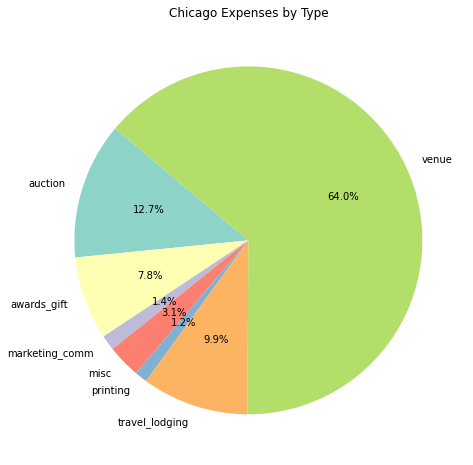

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
chicago_df = df[(df['location'] == 'chicago')].copy()

# Group by expense type and sum the amounts
expense_totals = chicago_df.groupby('expense_type')['amount'].sum()

# Get the Set3 colormap
cmap = plt.get_cmap('Set3')
colors = cmap(range(len(expense_totals)))

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(expense_totals, labels=expense_totals.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Chicago Expenses by Type')
plt.show()

Below are stacked bar charts analyzing the proportions of the expenses for each year. Both indicating the large size of the expenses going to venue related fees.

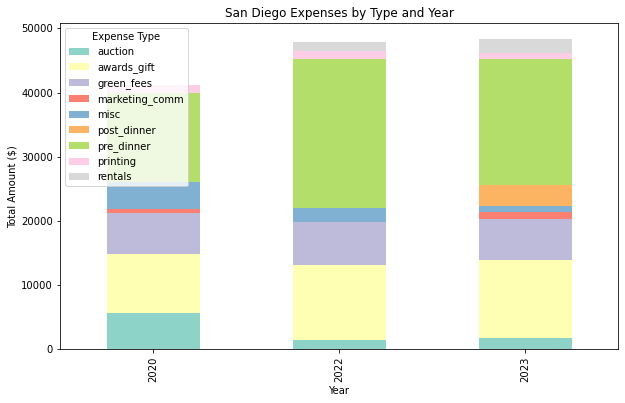

In [6]:
# Filter the DataFrame for the location 'San Diego'
san_diego_df = df[df['location'] == 'san_diego'].copy()

# Convert the date column to datetime format and extract the year
san_diego_df['date'] = pd.to_datetime(san_diego_df['date'])
san_diego_df['year'] = san_diego_df['date'].dt.year

# Create a pivot table using pd.crosstab
pivot_df = pd.crosstab(index=san_diego_df['year'], columns=san_diego_df['expense_type'], values=san_diego_df['amount'], aggfunc='sum').fillna(0)

# Get the Set3 colormap
cmap = plt.get_cmap('Set3')
colors = cmap(range(len(pivot_df.columns)))

# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('San Diego Expenses by Type and Year')
plt.xlabel('Year')
plt.ylabel('Total Amount ($)')
plt.legend(title='Expense Type')
plt.show()

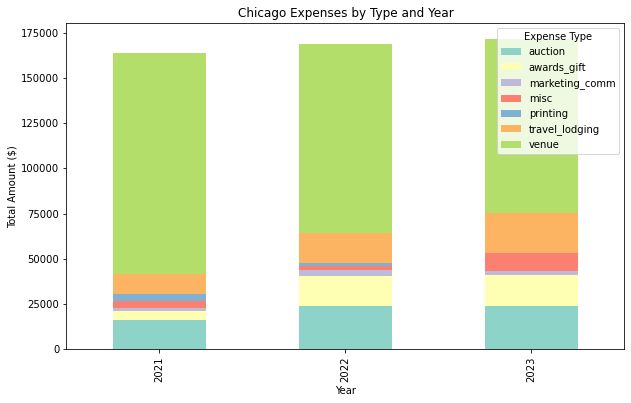

In [7]:
# Filter the DataFrame for the location 'San Diego'
chicago_df = df[df['location'] == 'chicago'].copy()

# Convert the date column to datetime format and extract the year
chicago_df['date'] = pd.to_datetime(chicago_df['date'])
chicago_df['year'] = chicago_df['date'].dt.year

# Create a pivot table using pd.crosstab
pivot_df = pd.crosstab(index=chicago_df['year'], columns=chicago_df['expense_type'], values=chicago_df['amount'], aggfunc='sum').fillna(0)

# Get the Set3 colormap
cmap = plt.get_cmap('Set3')
colors = cmap(range(len(pivot_df.columns)))

# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Chicago Expenses by Type and Year')
plt.xlabel('Year')
plt.ylabel('Total Amount ($)')
plt.legend(title='Expense Type')
plt.show()

## IDA

Since we are trying to find out if it would be feasible to expand to a new location in San Antonio, I would like to find out about the travel and logding expenses if they have a significant impact on the total expenses and their variability as it would also likely be of importance when considering travelling to a new location.

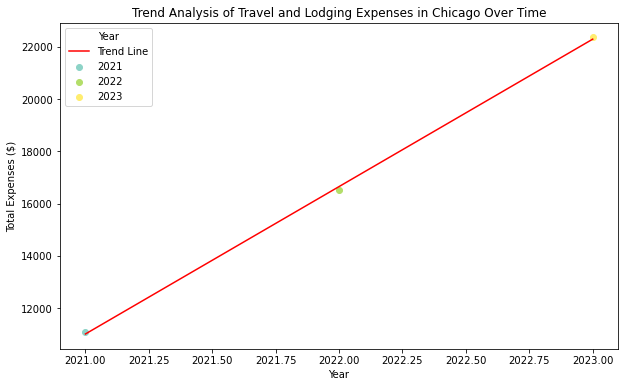

Slope of the trend line: 5641.584999999998
There is an upward trend in travel and lodging expenses over time.


In [14]:
# Filter for Chicago and travel_lodging expenses
chicago_df = df[(df['location'] == 'chicago') & (df['expense_type'] == 'travel_lodging')].copy()

# Extract the year from the 'date' column
chicago_df['Year'] = pd.to_datetime(chicago_df['date']).dt.year

# Group by year and sum the amounts
yearly_expenses = chicago_df.groupby('Year')['amount'].sum().reset_index()

# Prepare the data for linear regression
X = yearly_expenses[['Year']]
y = yearly_expenses['amount']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions for plotting
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)

# Get the Set3 colormap
cmap = plt.get_cmap('Set3')
colors = cmap(np.linspace(0, 1, len(yearly_expenses)))

# Plot the trend
plt.figure(figsize=(10, 6))
for i in range(len(yearly_expenses)):
    plt.scatter(yearly_expenses['Year'][i], yearly_expenses['amount'][i], color=colors[i], label=f'{yearly_expenses["Year"][i]}' if i == 0 or yearly_expenses['Year'][i] != yearly_expenses['Year'][i - 1] else "")
plt.plot(X_plot, y_plot, color='red', label='Trend Line')
plt.title('Trend Analysis of Travel and Lodging Expenses in Chicago Over Time')
plt.xlabel('Year')
plt.ylabel('Total Expenses ($)')
plt.legend(title='Year')
plt.show()

# Print the slope of the trend line
print(f"Slope of the trend line: {model.coef_[0]}")

# Check if the trend is significant
if model.coef_[0] > 0:
    print("There is an upward trend in travel and lodging expenses over time.")
elif model.coef_[0] < 0:
    print("There is a downward trend in travel and lodging expenses over time.")
else:
    print("There is no significant trend in travel and lodging expenses over time.")

Correlation Analysis with External Factors:

Tourism Rates: The overall tourism rates in Chicago, which can impact accommodation and transportation costs.

Hotel Occupancy Rates: The occupancy rates of hotels in the area, which can influence room pricing.

Inflation Rate: General price level increases could lead to higher expenses.